# IRIS FLOWER CLASSIFICATION

## AIM: The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

### PROBLEM TYPE: CLASSIFICATION

# AUTHOR: JAIMINKUMAR

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

# Import The Data

In [2]:
df = pd.read_csv('IRIS.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# Data Visualizations
## View the count plot of each species feature using seaborn.



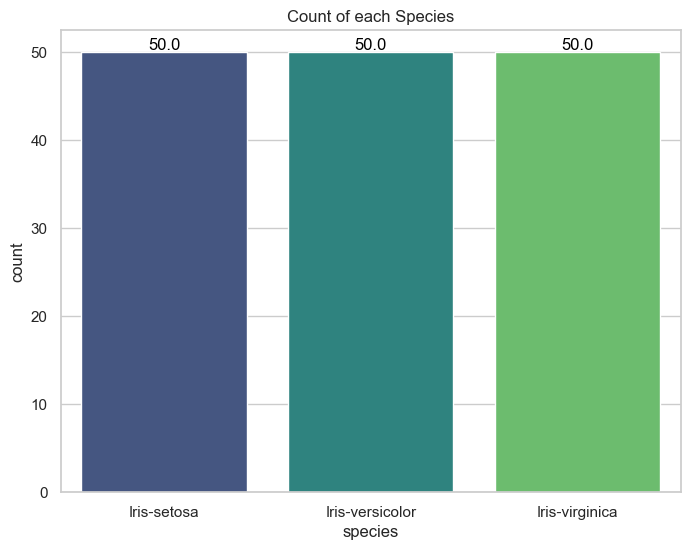

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='species', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of each Species')
plt.show()

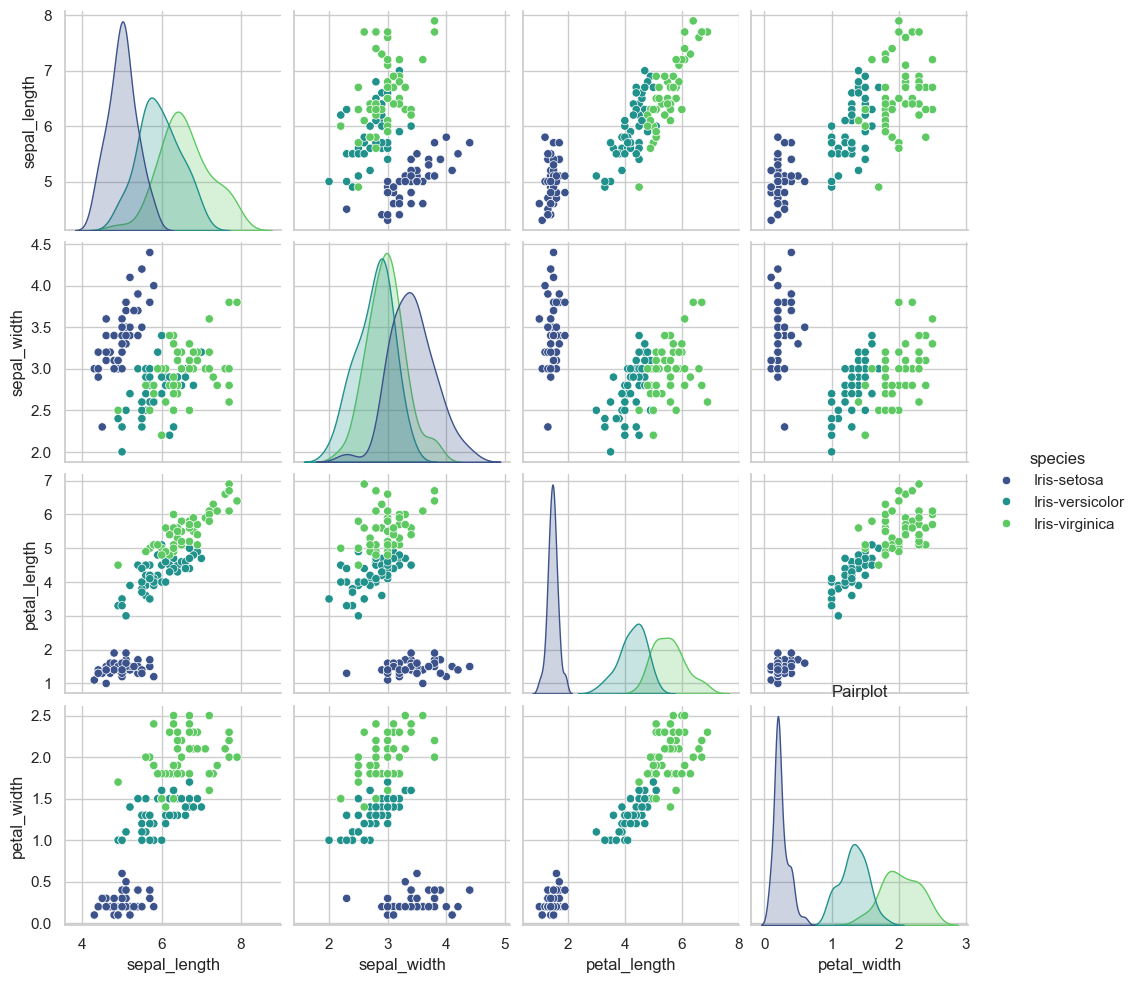

In [10]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', palette='viridis')
plt.title('Pairplot')
plt.show()

### Here is a scatter plot visualizing the relationship between petal length and petal width for all species in the Iris dataset:

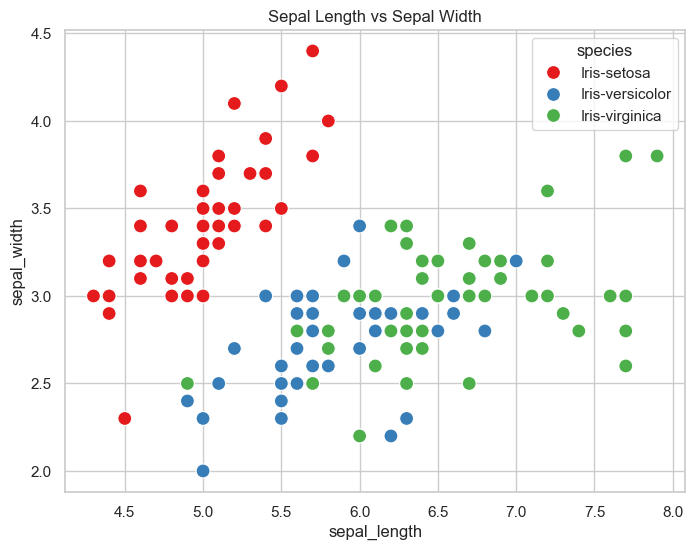

In [11]:
# Visualize the relationship between sepal length and sepal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', data= df, hue='species', palette='Set1', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.show()

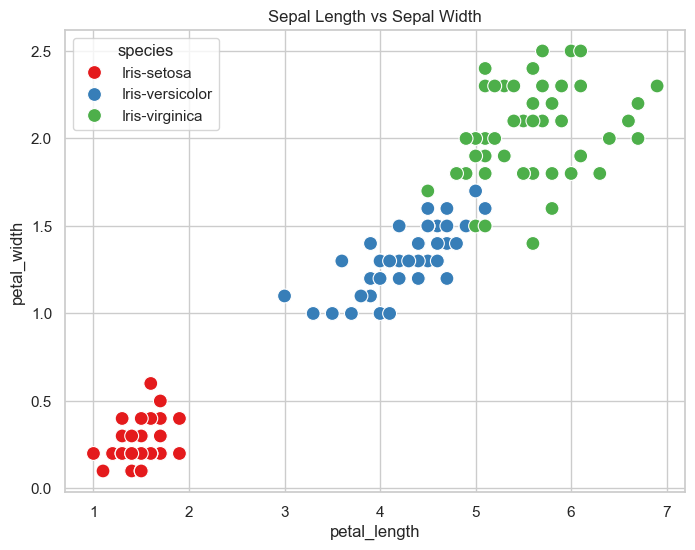

In [12]:
# Visualize the relationship between petal length and petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', data= df, hue='species', palette='Set1', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.show()

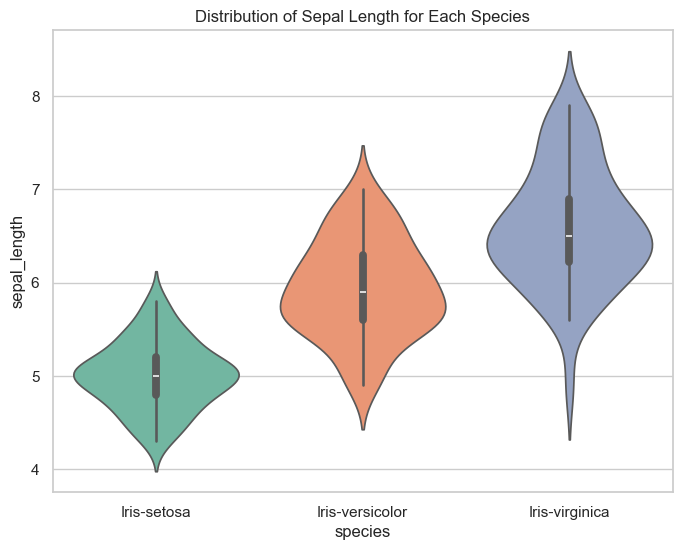

In [13]:
# Violin plot with different colors
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='sepal_length', data=df, palette='Set2')  # You can choose a different palette
plt.title('Distribution of Sepal Length for Each Species')
plt.show()

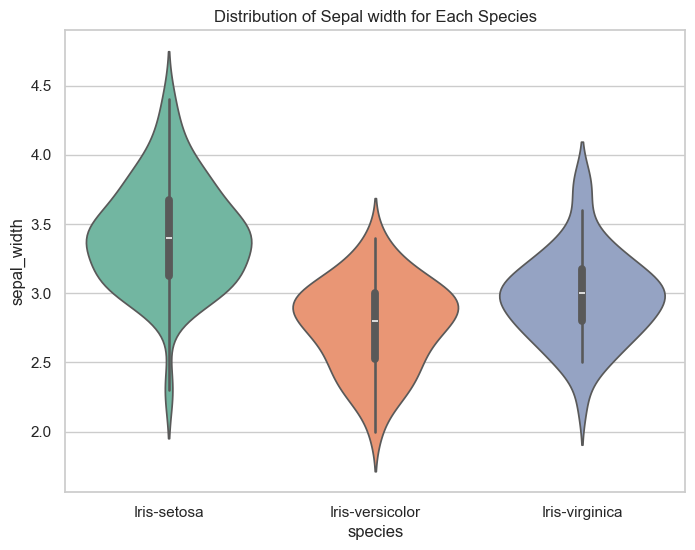

In [14]:
# Violin plot with different colors
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='sepal_width', data=df, palette='Set2')  # You can choose a different palette
plt.title('Distribution of Sepal width for Each Species')
plt.show()

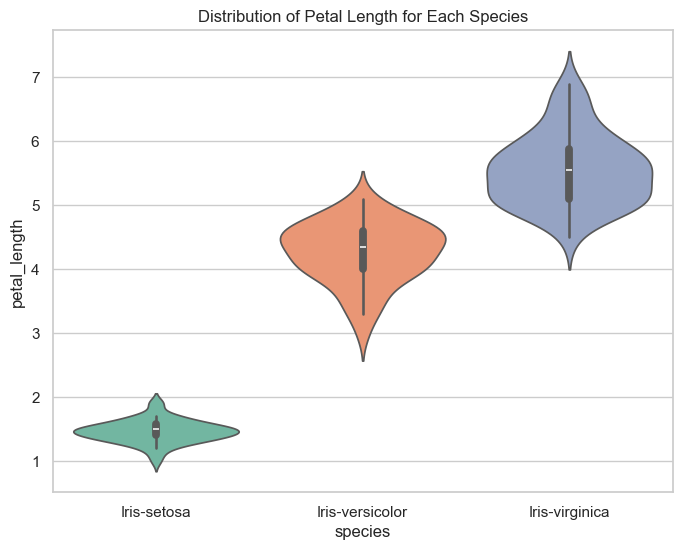

In [15]:
# Violin plot with different colors
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_length', data=df, palette='Set2')  # You can choose a different palette
plt.title('Distribution of Petal Length for Each Species')
plt.show()

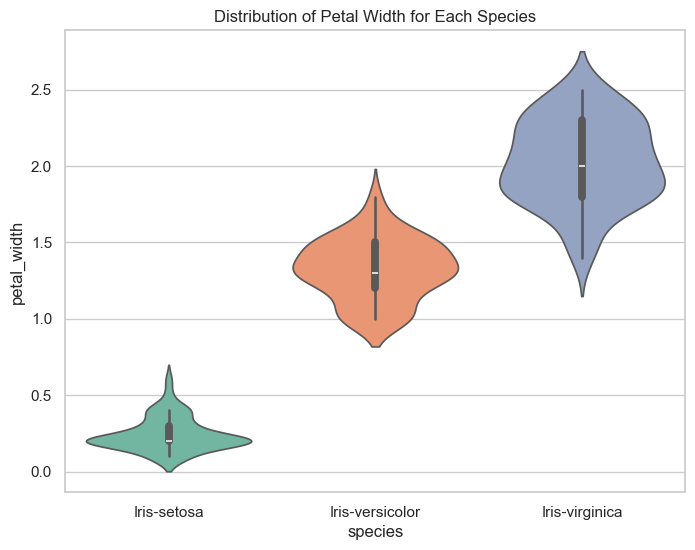

In [16]:
# Violin plot with different colors
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_width', data=df, palette='Set2')  # You can choose a different palette
plt.title('Distribution of Petal Width for Each Species')
plt.show()

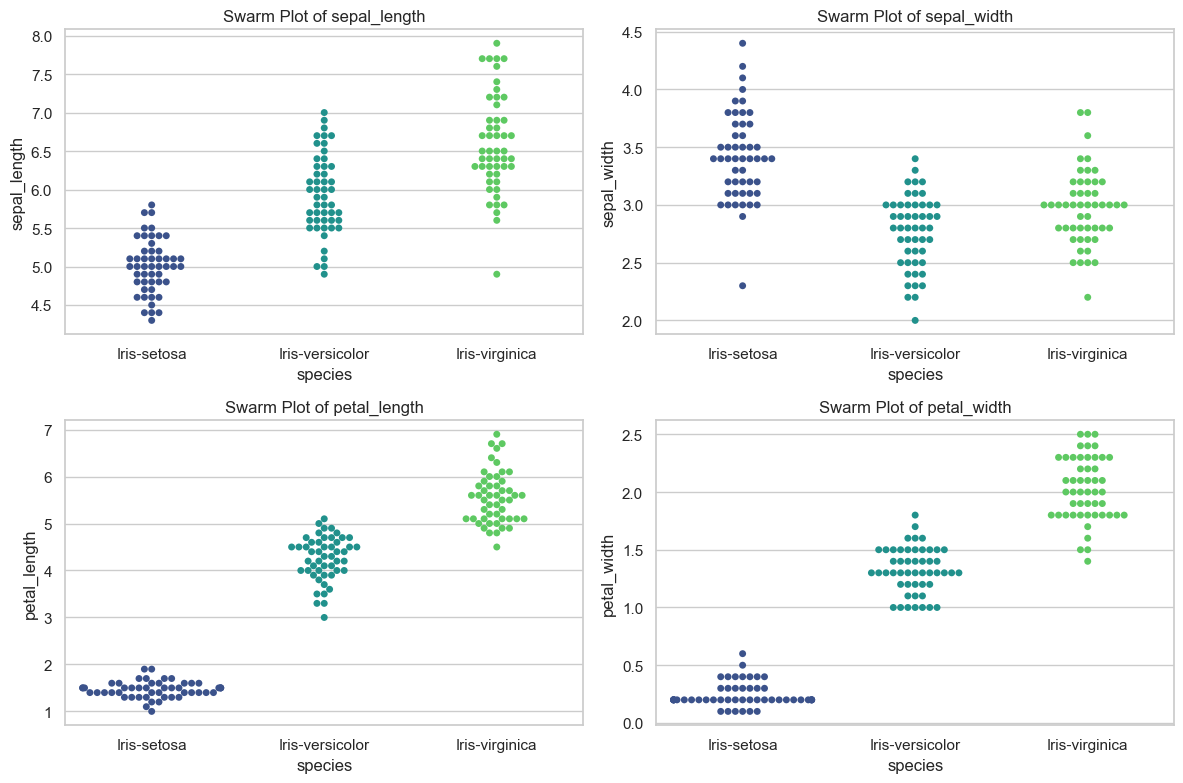

In [17]:
# Swarm plot for each feature by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.swarmplot(x='species', y=feature, data=df, palette='viridis')
    plt.title(f'Swarm Plot of {feature}')

plt.tight_layout()
plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

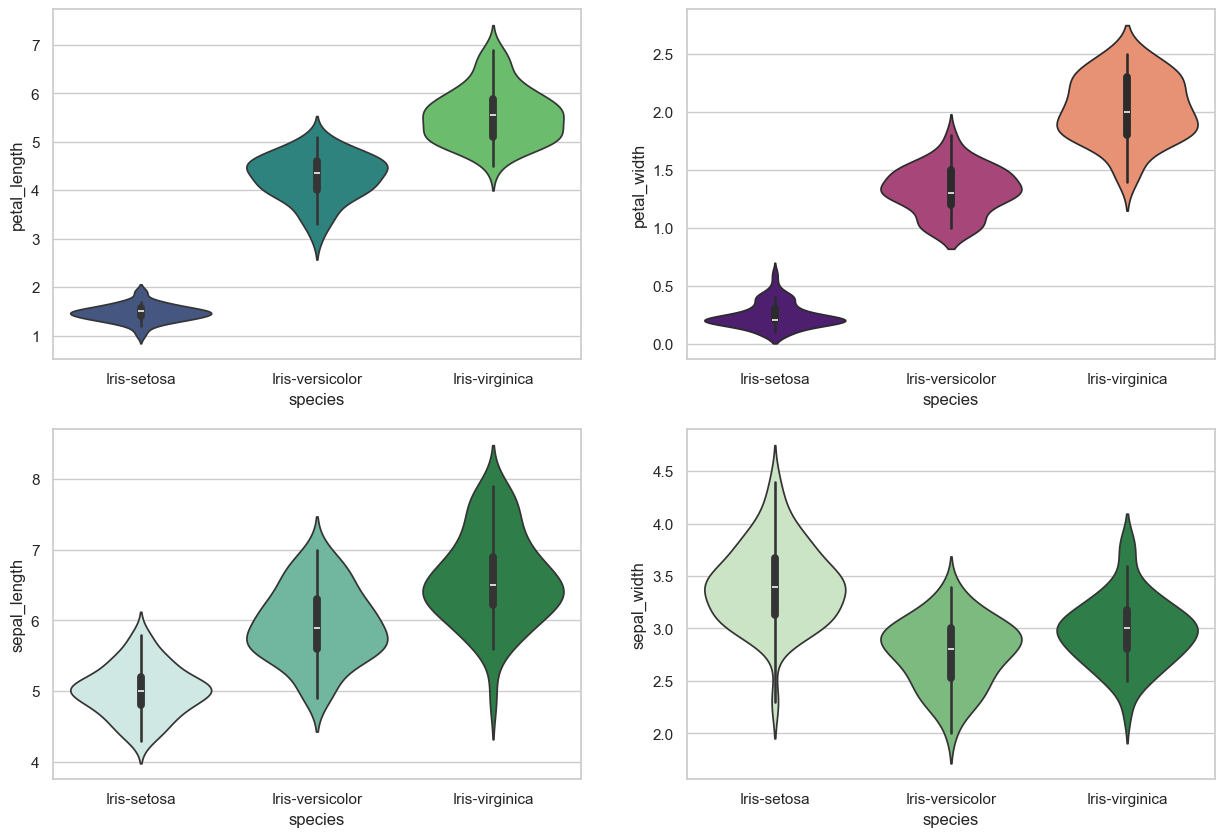

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df,palette='viridis')
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df,palette='magma')
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df,palette='BuGn')
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df,palette='Greens')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Apply Machine Learning Algorithms

## Split the data into features and the new numerical target

In [20]:
# Converting the categorical columns
df.replace({"species": {"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}}, inplace=True)

In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
X = df.drop('species', axis=1)
y = df[['species']]

In [23]:
df.reset_index()

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,1
1,1,4.9,3.0,1.4,0.2,1
2,2,4.7,3.2,1.3,0.2,1
3,3,4.6,3.1,1.5,0.2,1
4,4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,3
146,146,6.3,2.5,5.0,1.9,3
147,147,6.5,3.0,5.2,2.0,3
148,148,6.2,3.4,5.4,2.3,3


In [24]:
print(X.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   species
0        1
1        1
2        1
3        1
4        1


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


# Create the Model (Classification)

# Using Logistic Regression

In [27]:
# Create and train the logistic regression model
model=LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R-squared value
from sklearn.metrics import r2_score

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.0
R-squared: 1.0


## Using Random Forest Classifier

In [28]:
model = RandomForestClassifier(random_state=42)

In [29]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Using Decision Tree Classifier

In [31]:
model_3 = DecisionTreeClassifier()

In [32]:
model_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Make predictions and evaluate the model_3
X_test_prediction_3 = model_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, X_test_prediction_3)

In [34]:
print("LogisticRegression Model\nAccuracy Score: ", r2)
print()
print("RandomForestClassifier Model\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("DecisionTreeClassifier Model\nAccuracy Score: ", accuracy_3)

LogisticRegression Model
Accuracy Score:  1.0

RandomForestClassifier Model
Accuracy Score:  1.0

DecisionTreeClassifier Model
Accuracy Score:  1.0


### In this analysis, we employed three different classification models: Logistic Regression, Random Forest Classifier, and Decision Tree Classifier. Each model achieved a perfect accuracy score of 1.0, indicating that they were able to accurately predict the target variable for the given dataset.

## End...

## Thank You !!!